# Rt Live Model

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
import ssl
import csv
ssl._create_default_https_context = ssl._create_unverified_context
from matplotlib import pyplot as plt
from covid.models.generative import GenerativeModel
from covid.data import summarize_inference_data
%config InlineBackend.figure_format = 'retina'

from covid.data import get_and_process_covidtracking_data_il, get_and_process_covidtracking_data_ilsev, summarize_inference_data

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-hhcgj_ai because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Fetch data and select the state's data

In [2]:
df = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today())#-pd.Timedelta(days=1))
dfunn = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today(), norm=False)#-pd.Timedelta(days=1))
dfsev = get_and_process_covidtracking_data_ilsev(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))

In [3]:
region = "Israel"
model_data = df.loc[region]
model_sev = dfsev.loc[region]
model_unn = dfunn.loc[region]

## Create the model instance and sample

In [4]:
gmsev = GenerativeModel(region, model_sev, buffer_days = 20, delay=5+5)
gmsev.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 3192 seconds.


In [5]:
gm = GenerativeModel(region, model_data, delay=5)
gm.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 3154 seconds.


In [6]:
gmunn = GenerativeModel(region, model_unn, delay=2)
gmunn.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 3190 seconds.


## Summarize Model Output

In [7]:
result = summarize_inference_data(gm.inference_data)
resultsev = summarize_inference_data(gmsev.inference_data)
resultunn = summarize_inference_data(gmunn.inference_data)

In [8]:
result.tail(60)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-08-30,1.125309,1.125658,1.044494,1.193474,2574.689902,2065.086523,2254.507874,1103,12913
2020-08-31,1.125132,1.121493,1.048032,1.191488,2634.928442,2100.807186,1875.375704,2178,30653
2020-09-01,1.125164,1.122949,1.040595,1.193737,2696.545676,2139.053044,2158.575984,2251,27524
2020-09-02,1.120212,1.117052,1.040614,1.196929,2759.593624,2179.655934,2437.333758,3193,34577
2020-09-03,1.115386,1.114247,1.039813,1.193817,2823.875803,2222.471647,2066.986671,2661,33979
2020-09-04,1.111469,1.108642,1.038665,1.188081,2888.165996,2267.415811,2252.299183,2623,30738
2020-09-05,1.103560,1.101881,1.025403,1.180158,2951.341095,2314.442610,2597.619917,1505,15292
2020-09-06,1.094992,1.090586,1.011963,1.167381,3013.362150,2363.491160,3067.188447,2176,18725
2020-09-07,1.084515,1.083410,1.005001,1.153706,3073.291405,2414.483931,2234.724424,3388,40015


In [9]:
resultunn.tail(60)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-08-30,1.304767,1.303092,1.206007,1.399509,3213.297560,2151.790727,1103.0,1103,100000
2020-08-31,1.297528,1.297167,1.187777,1.382567,3392.140890,2251.667527,2178.0,2178,100000
2020-09-01,1.285781,1.283095,1.184771,1.367011,3578.626189,2360.505499,2251.0,2251,100000
2020-09-02,1.270892,1.268103,1.185254,1.367525,3771.782020,2478.417707,3193.0,3193,100000
2020-09-03,1.256429,1.253757,1.171437,1.352735,3968.924110,2605.364196,2661.0,2661,100000
2020-09-04,1.239464,1.239735,1.129520,1.313969,4166.972387,2741.229304,2623.0,2623,100000
2020-09-05,1.220989,1.219316,1.126844,1.302283,4364.079764,2885.810198,1505.0,1505,100000
2020-09-06,1.195934,1.194544,1.106125,1.273324,4558.350748,3038.686843,2176.0,2176,100000
2020-09-07,1.171899,1.169574,1.088612,1.255912,4746.966042,3199.136366,3388.0,3388,100000


In [10]:
resultsev.tail(30)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-09-28,0.746027,0.743668,0.684642,0.817447,65.627308,104.680882,93.0,93.0,10000
2020-09-29,0.741407,0.738882,0.672606,0.809209,62.258452,104.837083,133.0,133.0,10000
2020-09-30,0.736938,0.736081,0.662586,0.806793,58.984003,104.615869,127.0,127.0,10000
2020-10-01,0.734512,0.731670,0.657776,0.806672,55.815905,104.016781,125.0,125.0,10000
2020-10-02,0.733192,0.732184,0.647651,0.804777,52.764471,103.046529,105.0,105.0,10000
2020-10-03,0.731761,0.730241,0.638605,0.806361,49.843498,101.719216,89.0,89.0,10000
2020-10-04,0.729891,0.726670,0.641741,0.810381,47.067066,100.056376,139.0,139.0,10000
2020-10-05,0.729700,0.726035,0.641000,0.825375,44.436258,98.085187,119.0,119.0,10000
2020-10-06,0.728538,0.723779,0.619810,0.820651,41.942061,95.836701,92.0,92.0,10000


## Plot Model Output

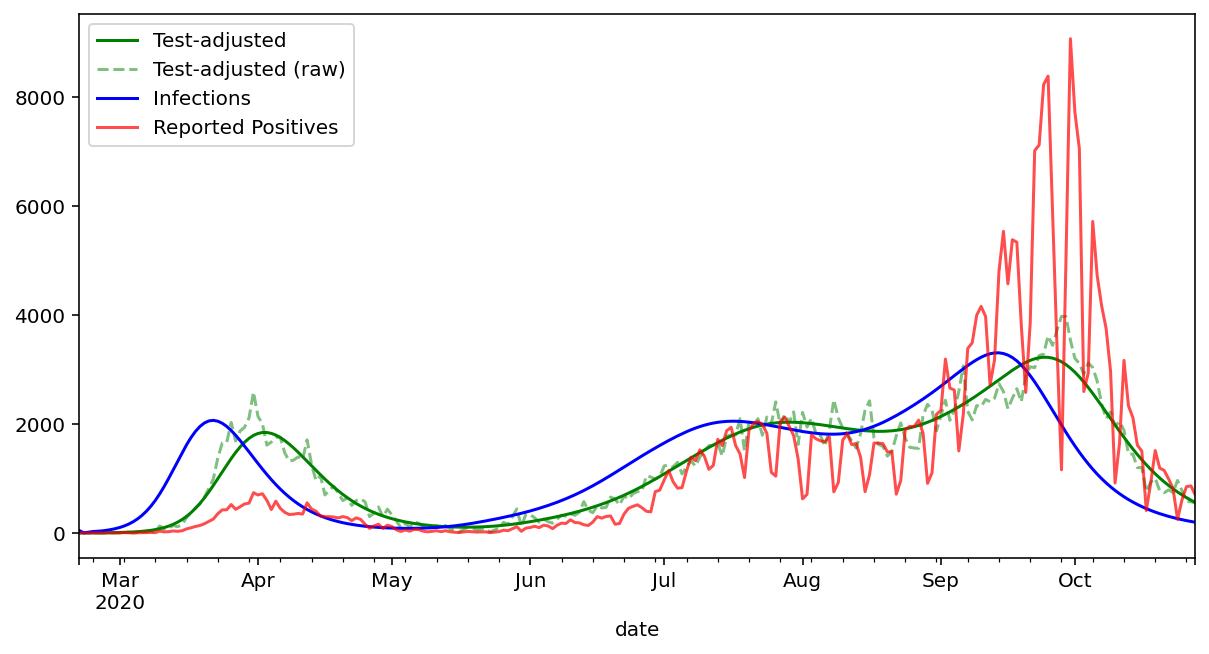

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
result.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result.infections.plot(c="b", label="Infections")
gm.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

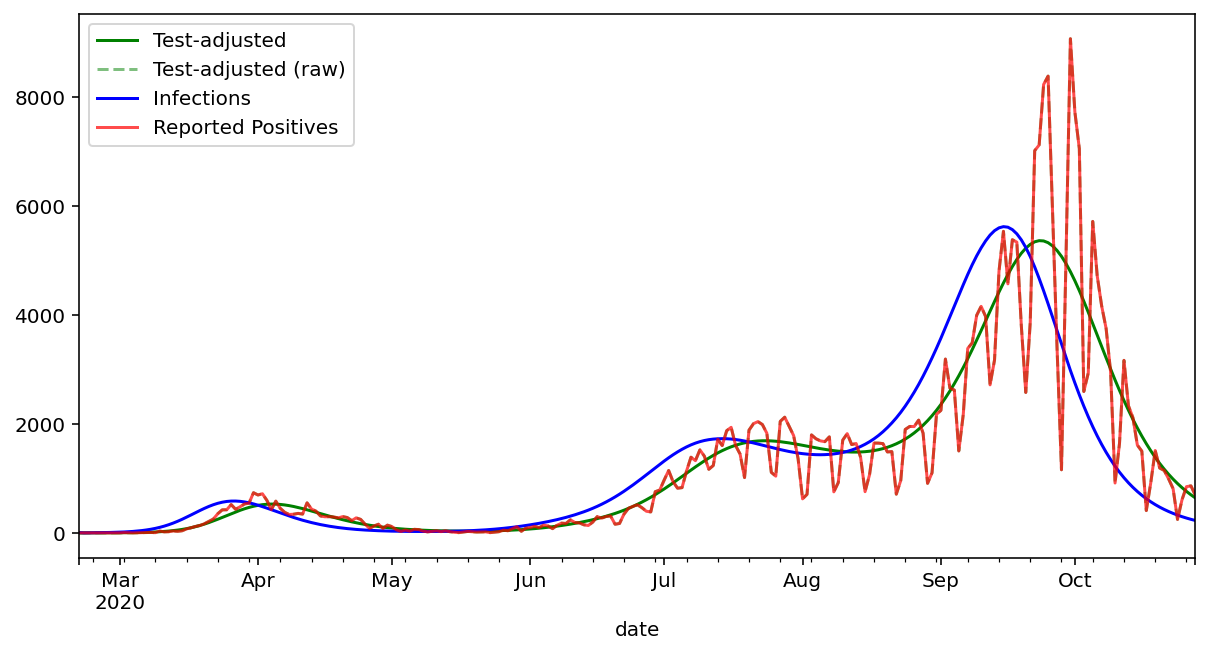

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
resultunn.test_adjusted_positive.plot(c="g", label="Test-adjusted")
resultunn.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
resultunn.infections.plot(c="b", label="Infections")
gmunn.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

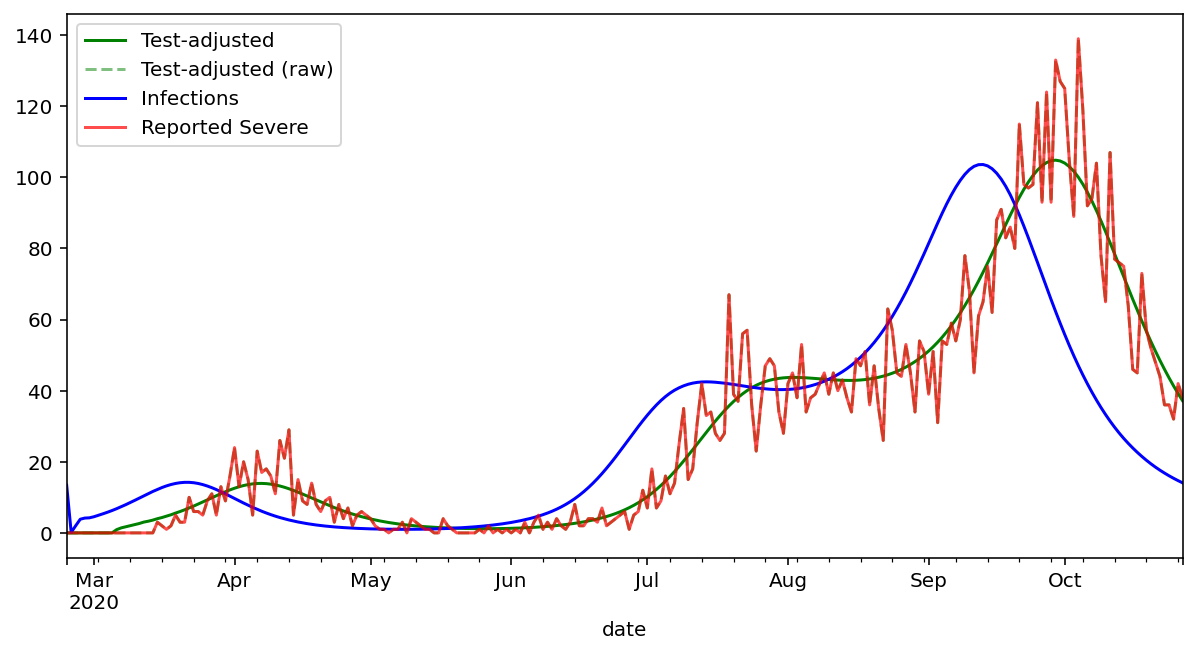

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
resultsev.test_adjusted_positive.plot(c="g", label="Test-adjusted")
resultsev.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
resultsev.infections.plot(c="b", label="Infections")
gmsev.observed.positive.plot(c='r', alpha=.7, label="Reported Severe")
fig.set_facecolor('w')
ax.legend();

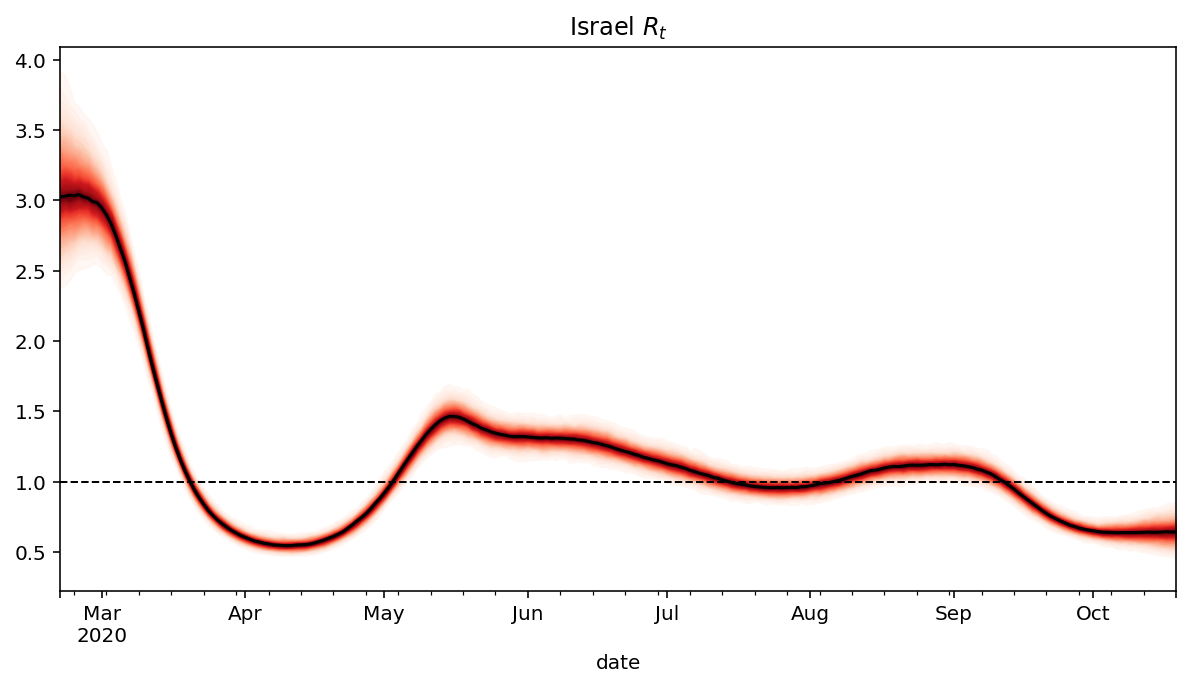

In [14]:
#plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$")
samples = gm.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_xlim(left = pd.Timestamp.today()-pd.Timedelta(days=70), right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_ylim(top = 2)
fig.set_facecolor('w')

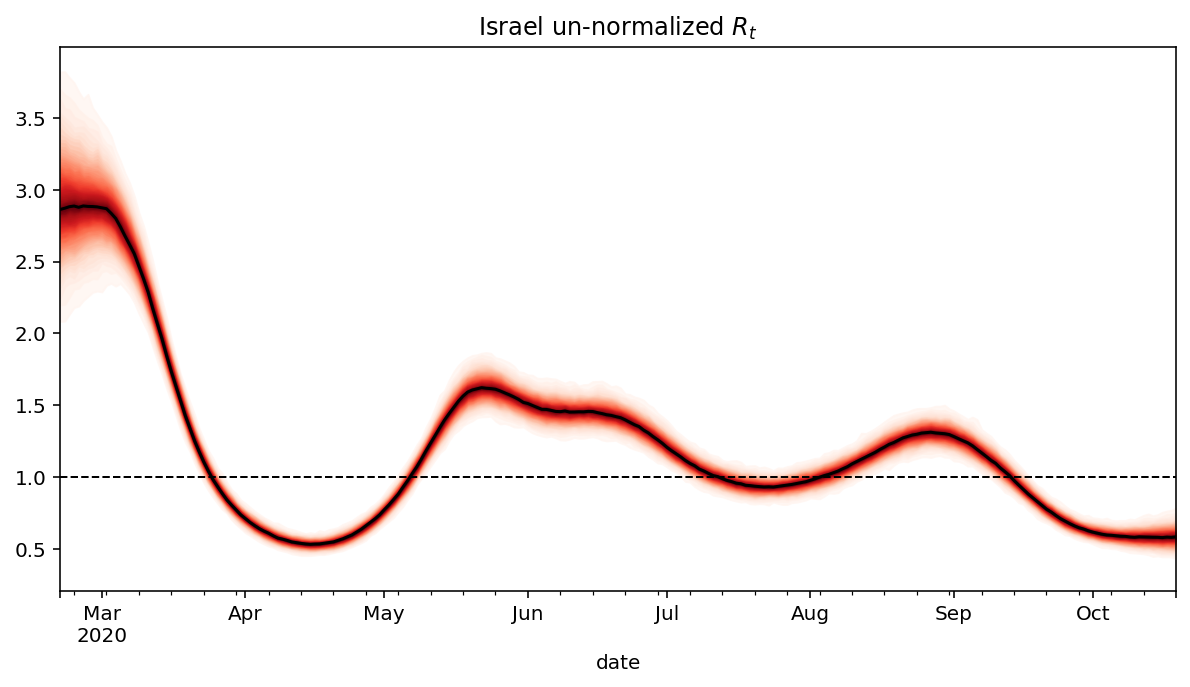

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} un-normalized $R_t$")
samples = gmunn.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

resultunn["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_xlim(left = pd.Timestamp.today()-pd.Timedelta(days=70), right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_ylim(top = 2)
fig.set_facecolor('w')

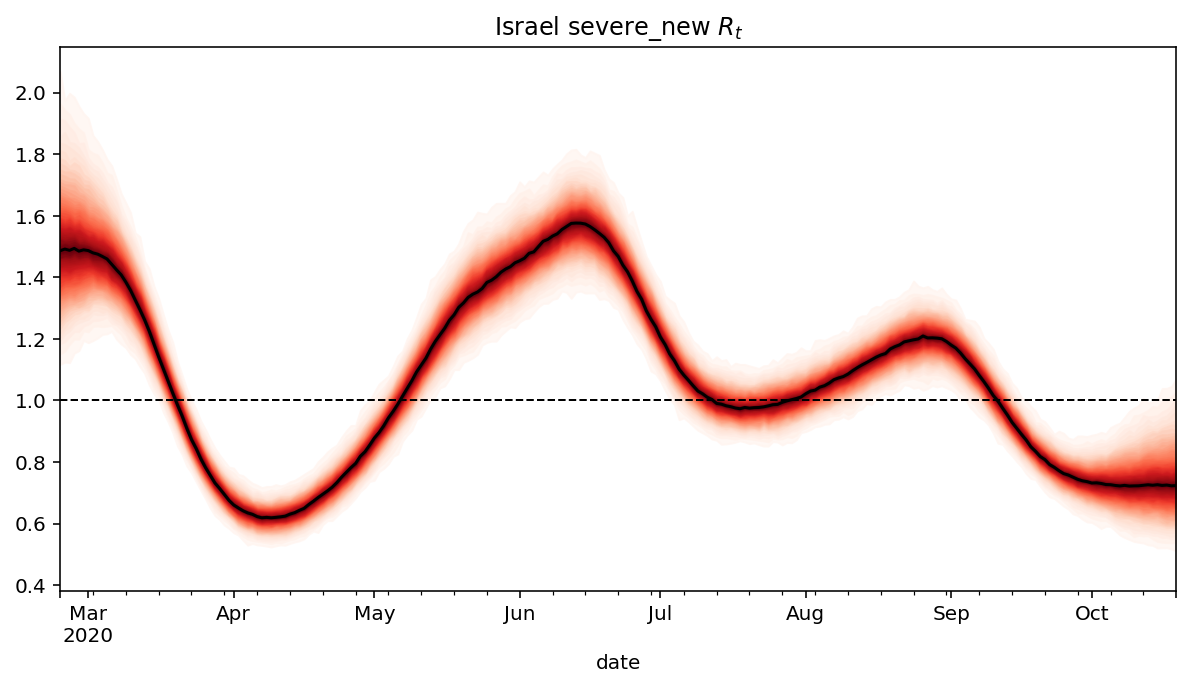

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} severe_new $R_t$")
samples = gmsev.trace['r_t']
x=resultsev.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

resultsev["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
fig.set_facecolor('w')

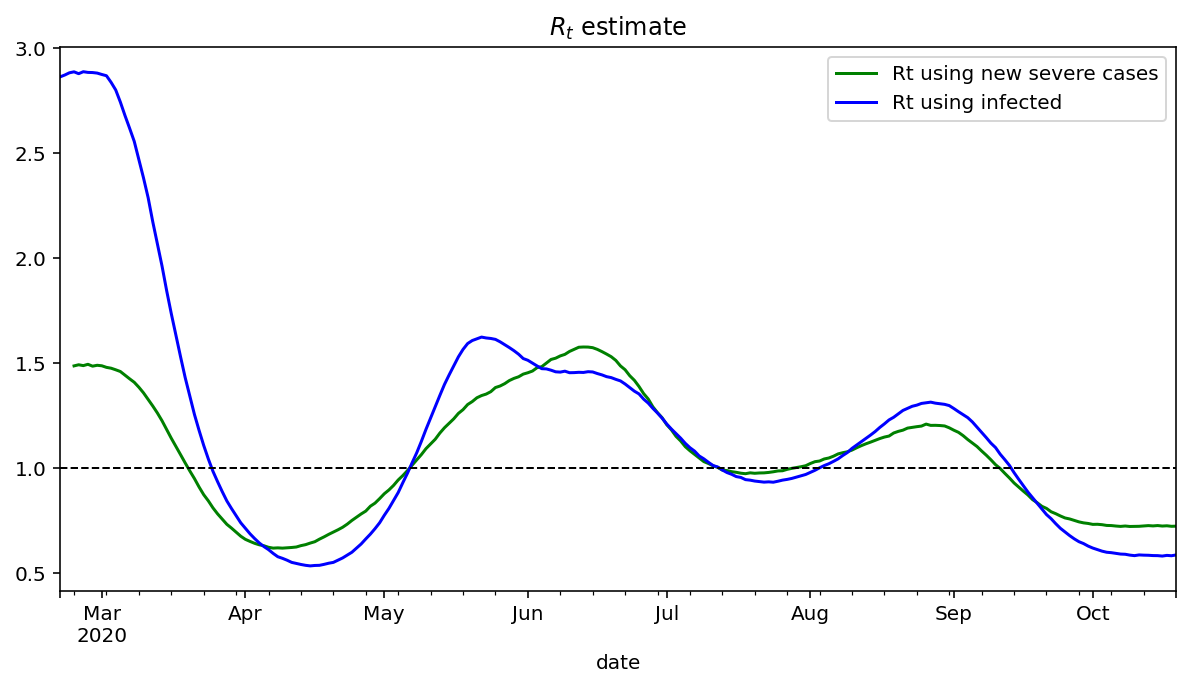

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f"$R_t$ estimate")
resultsev["median"].plot(c="g", ls='-', label="Rt using new severe cases")
resultunn["median"].plot(c="b", ls='-', label="Rt using infected")
ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
ax.legend()

In [ ]:
with open("results_unnormalized_out.csv", 'w', newline=)